In [ ]:
class TestBase(object):
    
    def __init__(self, **kwargs):
        print('Initalized class with kwargs:')
        for key, val in kwargs.items():
            print(f'{key}={val}')
        
        if 'to_save' in kwargs.keys():
            print(f"saving {kwargs['to_save']} as instance attr.")
            
    def meth(self, arg, **kwargs):
        print(kwargs)
        if 'meth_op' in kwargs.keys():
            print(f'We about to take {arg} and {kwargs.meth_op} it!')

In [ ]:
a_test_inst = TestBase(a=1, b=2, meth_op='multiply', to_save=4)

In [3]:
a_test_inst.meth(1)

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)
## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib

## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m

m_per_nm = fit.m_per_nm

eps_b = 1.778 ## Water
cm_per_nm = 1E-7

hres_obs_pts = diffi.observation_points(
    -480*m_per_nm, 480*m_per_nm, -480*m_per_nm, 480*m_per_nm, 201)

In [5]:
test_dip_prop = fit.DipoleProperties(param_file='/curly_nrod_water_JC.yaml')

In [6]:
test_dip_prop.alpha1_diag_dyad

array([[4.17412630e-17+3.32958974e-16j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 1.22128964e-17+4.41612832e-19j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        1.22128964e-17+4.41612832e-19j]])

In [7]:
test_coupled_dip = fit.CoupledDipoles(param_file='/curly_nrod_water_JC.yaml')

In [32]:
test_loc = np.array([[100,0,0], [50,50,0]])

[mol_E, plas_E, p0_unc_E, p0, p1] = test_coupled_dip.dipole_fields(
    test_loc)

In [33]:
mol_E.shape

(3, 2, 10000)

In [34]:
test_molexp = fit.MolCoupNanoRodExp(test_loc, param_file='/test_varient_curly_nrod_water_JC.yaml')

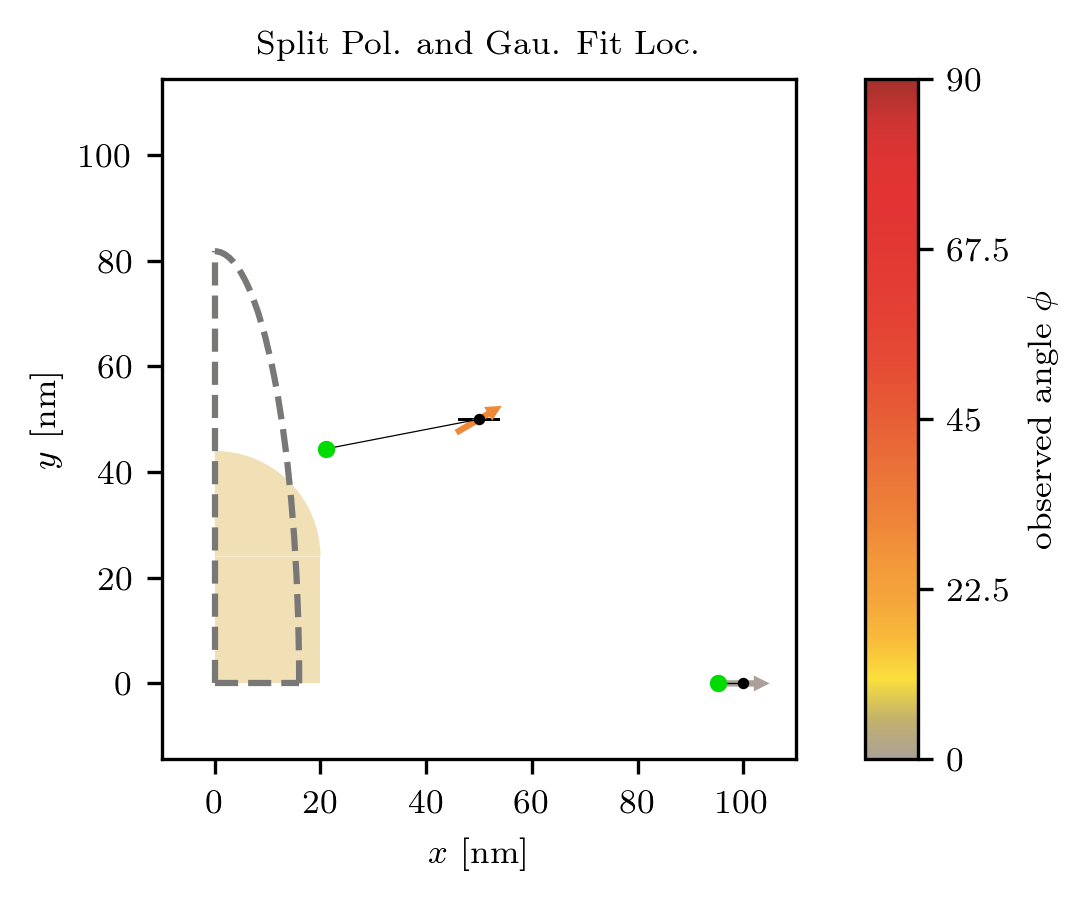

In [35]:
test_molexp.plot_mispol_map_wMisloc()

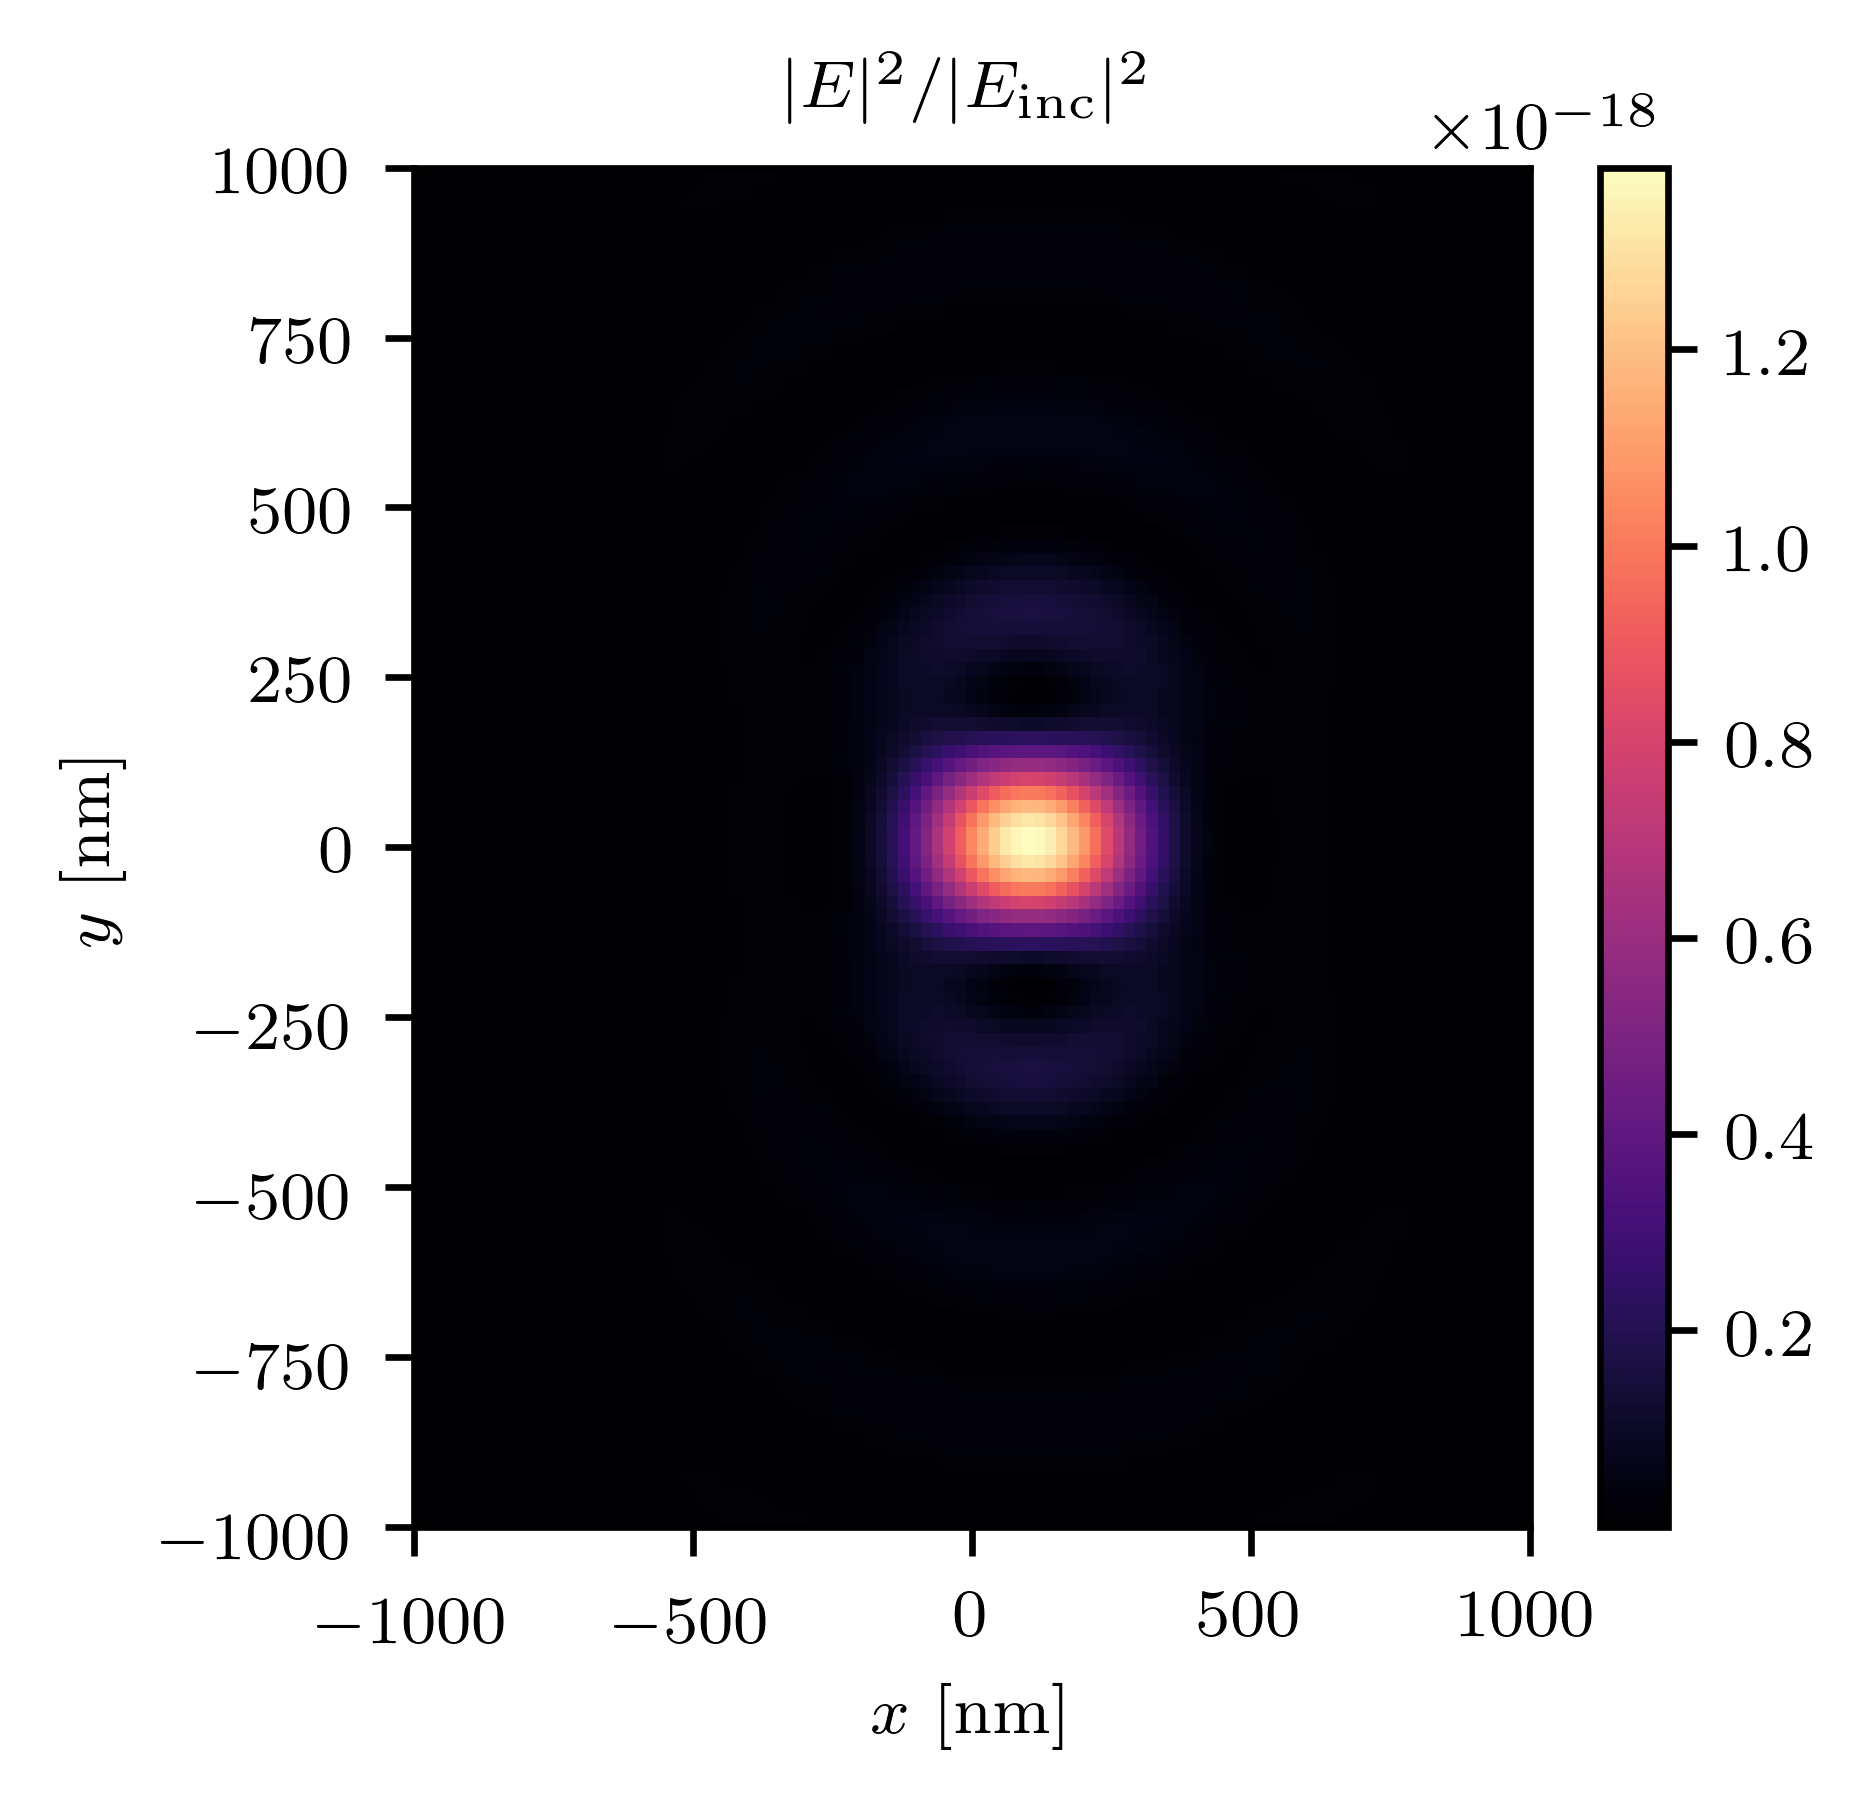

In [36]:
test_molexp.plot_fields(0)

## Testing 'FitModelToData'
Will require some data, so Ill move over to the bem module and get up to speed
